In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to import first execute this command in the bash
# cp drive/MyDrive/fabric_classification/Fabric_Classification/my_utils.py .
import my_utils

In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re

import pathlib

path = "/content/drive/MyDrive/fabric_classification/Fabrics_simple"
data_dir = pathlib.Path(path)

In [ ]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 1008 files belonging to 2 classes.
Using 807 files for training.
Found 1008 files belonging to 2 classes.
Using 201 files for validation.
['Denim', 'Wool']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, input_shape=(32, 400, 400, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

checkpoint = my_utils.generate_callback("/content/drive/MyDrive/fabric_classification/", "Model-2a-NoAug-fs")

hist = model.fit(
    train_ds, 
    validation_data = val_ds, 
    epochs = 50, 
    verbose = 1, 
    callbacks = [checkpoint])

model.summary()

Epoch 1/50
26/26 [==============================] - ETA: 0s - loss: 1.0742 - accuracy: 0.6022
Epoch 1: val_accuracy improved from -inf to 0.69652, saving model to /content/drive/MyDrive/fabric_classification/Model-2a-NoAug-fs.h5
26/26 [==============================] - 118s 3s/step - loss: 1.0742 - accuracy: 0.6022 - val_loss: 0.6154 - val_accuracy: 0.6965
Epoch 2/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6294 - accuracy: 0.6438
Epoch 2: val_accuracy did not improve from 0.69652
26/26 [==============================] - 3s 121ms/step - loss: 0.6286 - accuracy: 0.6431 - val_loss: 0.5111 - val_accuracy: 0.6965
Epoch 3/50
25/26 [===========================>..] - ETA: 0s - loss: 0.5534 - accuracy: 0.7163
Epoch 3: val_accuracy improved from 0.69652 to 0.86070, saving model to /content/drive/MyDrive/fabric_classification/Model-2a-NoAug-fs.h5
26/26 [==============================] - 3s 132ms/step - loss: 0.5513 - accuracy: 0.7187 - val_loss: 0.4630 - val_accuracy: 0.8607
Ep

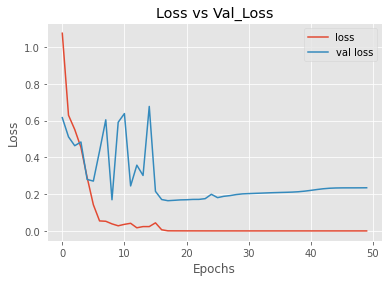

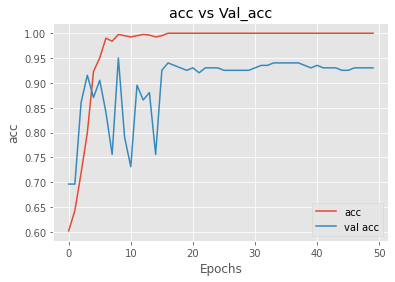

0

In [ ]:
my_utils.generate_plot(hist)

(201, 2)
[[135   5]
 [  9  52]]


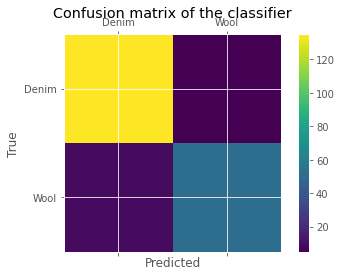

0

In [ ]:
my_utils.generate_cm(model, val_ds, class_names)